In [1]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import os
import json
import matplotlib
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [2]:
# MATERIAL_PATH = "../All_mat_new_test_score_with_horz_flat_index.csv"
# DATA_PATH = "../../data"

# "henry's local data path"
DATA_PATH = "../../MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA"

## Start with Anupam's list of materials

In [3]:
material_df = pd.read_csv("../All_mat_new_test_score_with_horz_flat_index.csv", index_col="ID")
print(material_df.shape)
material_df.head()

(5270, 24)


,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,D,E,F,radio,f_orb,sg_sto_group,percentage_flat
ID,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,276.0,24.2
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,...,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN


In [4]:
# Select flat materials only
flat_df = material_df[material_df.horz_flat_seg > 0]
flat_df.shape

(2005, 24)

## Fingerprint Functions Here
Fingerprint functions take material ID as only input

In [ ]:
np.ones(10)-5

In [57]:
def calc_fingerprint(material_id, fingerprint_length):
    #global edges
    filename_bands=DATA_PATH+"/bands/"+material_id+'.json'
    if not os.path.isfile(filename_bands):
        print("!!!! No such file %s" % filename_bands)
    bands_dict=json.load(open(filename_bands))

    
    energy_bands = np.array(bands_dict["bands"]["1"])
    band_means = np.mean(energy_bands, axis=1)
    efermi = bands_dict["efermi"]
    
    # we want band that is closest BELOW the fermi energy (without overlap, this is the set of last filled states)
    # we also shift by efermi
    closest_below_efermi = energy_bands[band_means<efermi][-1]
    closest_below_efermi -= np.ones(len(closest_below_efermi))*efermi
    
    #print(closest_below_efermi)
    
    # now we have to average in some bins to make all the fingerprints the same length
#     energy_bin_edge = np.linspace(0, len(closest_below_efermi, fingerprint_length+1)
    
#     print(energy_bin_edge)
                                  
#     averaged_fingerprint = np.array([])

#     for i in range(0, len(closest_below_efermi)-1):
#         E_slice_mask = (closest_below_efermi>=energy_bin_edge[i]) & (closest_below_efermi<=energy_bin_edge[i+1])
#         averaged_fingerprint = np.append(averaged_fingerprint, np.average(closest_below_efermi[E_slice_mask]))
    
#     print(averaged_fingerprint)
#     print(len(averaged_fingerprint))
#     plt.plot(averaged_fingerprint)
    #plt.plot(closest_below_efermi)
    
    return closest_below_efermi[:fingerprint_length]
    
fp = calc_fingerprint("2dm-100", 60)
print(len(fp))
#plt.plot(fp)
#fp

60


In [58]:
fingerprint_length = 60
finger_print_array = np.zeros([len(flat_df), fingerprint_length])

In [59]:
for i, material_id in enumerate(flat_df.index):
    if i % 100 == 0:
        print(i, "/", len(flat_df))

    finger_print_array[i, :] = calc_fingerprint(material_id, fingerprint_length)

print(finger_print_array)

0 / 2005
100 / 2005
200 / 2005
300 / 2005
400 / 2005
500 / 2005
600 / 2005
700 / 2005
800 / 2005
900 / 2005
1000 / 2005
1100 / 2005
1200 / 2005
1300 / 2005
1400 / 2005
1500 / 2005
1600 / 2005
1700 / 2005
1800 / 2005
1900 / 2005


ValueError: could not broadcast input array from shape (4,) into shape (60,)

In [60]:
df = flat_df.join(pd.DataFrame(finger_print_array, index=flat_df.index))
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,53,54,55,56,57,58,59
ID,,,,,,,,,,,,,,,
2dm-3,TlS,AB,2,4,4,0.84646,bottom-up,...,-0.461667,-0.462367,-0.463267,-0.464467,-0.465767,-0.467167,-0.468467
2dm-21,TaI3,AB3,162,3,3,0.88201,bottom-up,...,0.088246,0.074746,0.057346,0.037246,0.015746,0.002246,-0.002754
2dm-22,Li2O,AB2,164,3,3,0.96678,bottom-up,...,-0.237175,-0.207875,-0.181375,-0.157875,-0.137575,-0.120675,-0.107375
2dm-25,VBr4,AB4,123,3,3,0.97834,bottom-up,...,-0.382174,-0.450174,-0.522974,-0.600074,-0.680874,-0.764174,-0.846674
2dm-29,SBr,AB,2,4,4,0.82037,bottom-up,...,-0.041417,-0.037817,-0.039017,-0.044317,-0.052917,-0.063217,-0.073717


In [61]:
#check for NaNs 
np.isnan(finger_print_array).sum()

0

In [62]:
df.isna().sum()[ df.isna().sum() != 0 ]

exfoliation_eg     606
decomp_eng          47
B                   10
C                 1124
D                 1752
E                 2005
F                 2005
dtype: int64

In [5]:
# save df
df.to_csv("materials_data_fermi_band_fingerprint_60.csv")

NameError: name 'df' is not defined

## Clustering

In [10]:
df = pd.read_csv("materials_data_fermi_band_fingerprint_60.csv")
fingerprint_length = 60
fingerprint_cols = [str(i) for i in range(fingerprint_length)]
fingerprint_array = df[fingerprint_cols]

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(fingerprint_array)

labels = clusterer.labels_
df["labels"] = labels
print(np.unique(labels, return_counts=True))
df[df.labels==1].head(19)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21], dtype=int64), array([1847,    5,    4,    6,   12,    7,    4,   11,    8,    4,    8,
          7,    4,    5,    7,    5,    6,    5,    4,   25,    6,    6,
          9], dtype=int64))


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,54,55,56,57,58,59,labels
583,2dm-1914,P4C3,A3B4,187,3,3,0.67035,...,-0.365707,-0.312607,-0.258607,-0.204407,-0.151107,-0.100307,1
874,2dm-2888,As4C3,A3B4,187,3,3,0.76568,...,-0.394388,-0.343888,-0.292188,-0.239588,-0.186988,-0.135088,1
1053,2dm-3671,Ta2Te5Pd3,A2B3C5,31,4,4,0.91081,...,-0.370213,-0.284013,-0.202513,-0.136513,-0.096413,-0.085813,1
1150,2dm-3925,AgHgSBr,ABCD,51,4,4,0.94544,...,-0.395980,-0.326580,-0.257880,-0.192080,-0.131580,-0.079580,1


In [11]:
from ipywidgets import interact

def view_cluster(label):
    display(df[df.labels==label].head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
        ax[i].plot(np.linspace(-8, 8, fingerprint_length), df.loc[index][fingerprint_cols])


    
    
interact(view_cluster, label=(-1, len(np.unique(labels))-2, 1))

interactive(children=(IntSlider(value=10, description='label', max=21, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

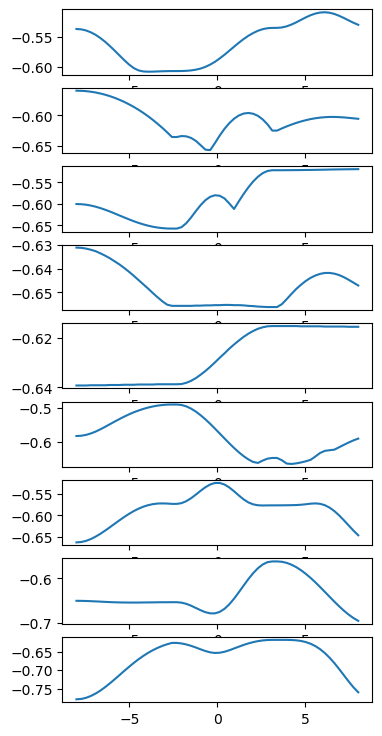

In [8]:
label = 1
num_plots = len(df[df.labels==label])

fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

for i, index in enumerate(df[df.labels==label].index):
    # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
    ax[i].plot(np.linspace(-8, 8, fingerprint_length), df.loc[index][fingerprint_cols])

plt.show()

## T-SNE Plot

In [9]:
n_components=2
tsne = manifold.TSNE(n_components=n_components, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=50 ,n_iter=10000, verbose=2)
fingerprints_2d = tsne.fit_transform(fingerprint_array)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2005 samples in 0.001s...
[t-SNE] Computed neighbors for 2005 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2005
[t-SNE] Computed conditional probabilities for sample 2000 / 2005
[t-SNE] Computed conditional probabilities for sample 2005 / 2005
[t-SNE] Mean sigma: 0.173388
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 66.7206726, gradient norm = 0.0044108 (50 iterations in 0.756s)
[t-SNE] Iteration 100: error = 66.3704910, gradient norm = 0.0000705 (50 iterations in 0.546s)
[t-SNE] Iteration 150: error = 66.3717880, gradient norm = 0.0000507 (50 iterations in 0.501s)
[t-SNE] Iteration 200: error = 66.3722153, gradient norm = 0.0000303 (50 iterations in 0.495s)
[t-SNE] Iteration 250: error = 66.3723831, gradient norm = 0.0000325 (50 iterations in 0.472s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.372383
[t-SNE] Iteration 300: err

[t-SNE] Iteration 4150: error = 1.0094072, gradient norm = 0.0000759 (50 iterations in 0.832s)
[t-SNE] Iteration 4200: error = 1.0094461, gradient norm = 0.0000518 (50 iterations in 0.823s)
[t-SNE] Iteration 4250: error = 1.0094355, gradient norm = 0.0000754 (50 iterations in 0.845s)
[t-SNE] Iteration 4300: error = 1.0094328, gradient norm = 0.0000716 (50 iterations in 0.819s)
[t-SNE] Iteration 4350: error = 1.0094928, gradient norm = 0.0000526 (50 iterations in 0.839s)
[t-SNE] Iteration 4400: error = 1.0094756, gradient norm = 0.0001593 (50 iterations in 0.808s)
[t-SNE] Iteration 4450: error = 1.0094576, gradient norm = 0.0000733 (50 iterations in 0.840s)
[t-SNE] Iteration 4500: error = 1.0094533, gradient norm = 0.0000586 (50 iterations in 0.892s)
[t-SNE] Iteration 4500: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 4500 iterations: 1.009453


C:\Users\hkpen\AppData\Local\Temp\ipykernel_14136\2144989371.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


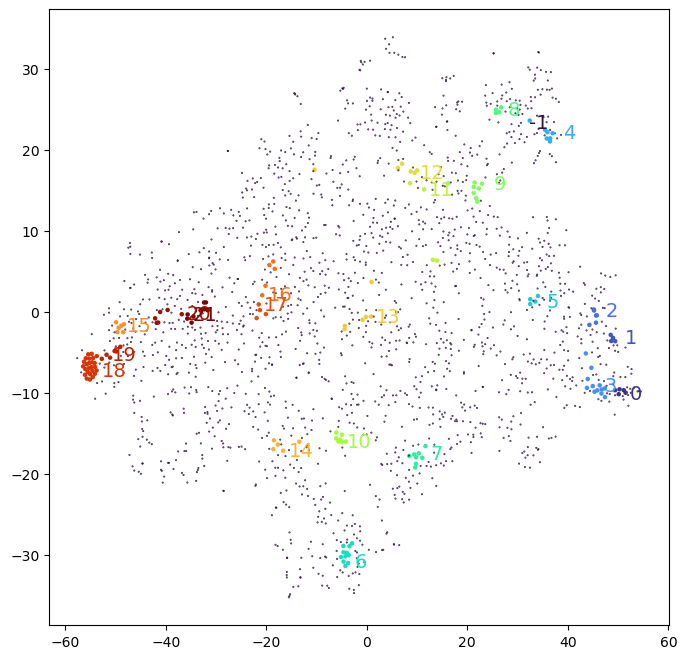

In [12]:
fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2

unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
            col=cmap(norm(labels[rep_id]))
            plt.annotate(labels[rep_id],fingerprints_2d[rep_id,:]+[3.5,0],color=col,alpha=1, weight='normal', ha='center', va='center', size=14).draggable()
            
plt.scatter(fingerprints_2d[:,0], fingerprints_2d[:,1],s=size, c=labels*5, cmap="turbo")